In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

2024-03-25 15:42:25.587370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import load_model

model = load_model('./models/model_01.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


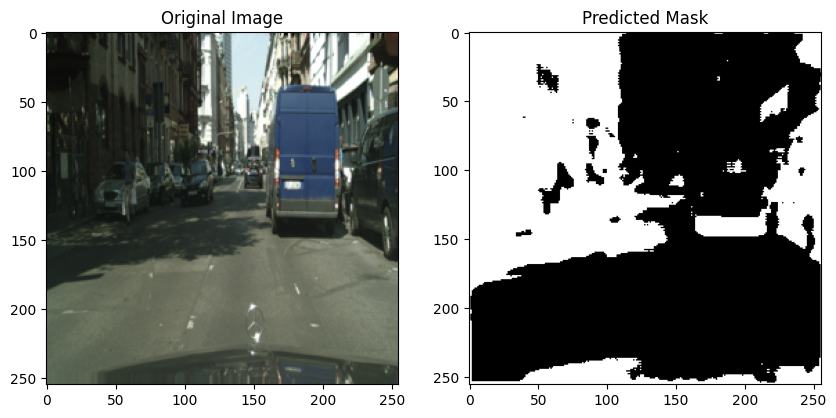

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

input_shape = (256, 256, 3)

def predict_image(model, image_path, threshold=0.2):
    image = img_to_array(Image.open(image_path).convert('RGB').resize(input_shape[:2]))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    mask = model.predict(image)
    binary_mask = np.where(mask >= threshold, 1, 0)
    return binary_mask[0]
    #return mask[0]

image_path = './images_val/frankfurt_000001_031416.png'
predicted_mask = predict_image(model, image_path)

img = Image.open(image_path)
img = img.resize((255, 255))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[:, :, 0], cmap='gray')  # Utiliser 'gray' pour une colormap binaire
plt.title('Predicted Mask')

plt.show()